### Read the data

In [157]:
import numpy as np
import scipy.io as sio
import h5py
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [159]:
file_path = '/Users/jinyanwei/Desktop/BP_Model/UCI_Cuffless_BloodPressureEstimation_DataSet /Part_1.mat'  # Replace with the path to your .mat file

with h5py.File(file_path, 'r') as f:
    print(list(f.keys()))  # List all the variables in the file

    # Access a specific variable and convert it to a NumPy array
    variable_name = 'Part_1'  # Replace with the name of the variable you want to access
    references = np.array(f[variable_name])

    # Dereference the objects and store them in a list
    data = []
    for ref in references.flat:
        dereferenced_object = np.array(f[ref])
        data.append(dereferenced_object)

print(data)

TypeError: 'list' object is not callable

In [ ]:
for i, array in enumerate(data):
    print(f"Shape of data[{i}]: {array.shape}")

Shape of data[0]: (61000, 3)
Shape of data[1]: (61000, 3)
Shape of data[2]: (50000, 3)
Shape of data[3]: (70000, 3)
Shape of data[4]: (69000, 3)
Shape of data[5]: (21000, 3)
Shape of data[6]: (71000, 3)
Shape of data[7]: (4000, 3)
Shape of data[8]: (2000, 3)
Shape of data[9]: (1000, 3)
Shape of data[10]: (1000, 3)
Shape of data[11]: (2000, 3)
Shape of data[12]: (1000, 3)
Shape of data[13]: (1000, 3)
Shape of data[14]: (28000, 3)
Shape of data[15]: (67000, 3)
Shape of data[16]: (64000, 3)
Shape of data[17]: (20000, 3)
Shape of data[18]: (57000, 3)
Shape of data[19]: (2000, 3)
Shape of data[20]: (2000, 3)
Shape of data[21]: (1000, 3)
Shape of data[22]: (4000, 3)
Shape of data[23]: (5000, 3)
Shape of data[24]: (72000, 3)
Shape of data[25]: (4000, 3)
Shape of data[26]: (4000, 3)
Shape of data[27]: (5000, 3)
Shape of data[28]: (6000, 3)
Shape of data[29]: (6000, 3)
Shape of data[30]: (5000, 3)
Shape of data[31]: (3000, 3)
Shape of data[32]: (5000, 3)
Shape of data[33]: (6000, 3)
Shape of da

In [ ]:
df = pd.DataFrame(data[5][:1000], columns=(('PPG','BP', 'ECG'))) #选取前1000条数据
df.to_csv('Part_1_data_0.csv')
display(df)
figdf = px.line(df)
figdf.show()

KeyError: 5

### Filter data

In [ ]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import neurokit2 as nk
import heartpy as hp

In [ ]:
ecg_data = df['ECG']
ppg_data = df['PPG']
bp_data = df['BP']

# Define the sampling rate (e.g., 1000 Hz)
sampling_rate = 1000

# Filter ECG data
ecg_filtered = nk.signal_filter(ecg_data, lowcut=0.5, highcut=50, method='butterworth', order=2, sampling_rate=sampling_rate)

# Filter PPG data
ppg_filtered = nk.signal_filter(ppg_data, lowcut=0.5, highcut=50, method='butterworth', order=2, sampling_rate=sampling_rate)


In [ ]:
ecg_df = pd.DataFrame(ecg_data)
ecg_fildf = pd.DataFrame(ecg_filtered, columns=['ECG Filtered'])
dfecg = pd.concat([ecg_df,ecg_fildf], axis=1)
display(dfecg)
figecg = px.line(dfecg)
figecg.show()

ppg_df = pd.DataFrame(ppg_data)
ppg_fildf = pd.DataFrame(ppg_filtered, columns=['PPG Filtered'])
dfppg = pd.concat([ppg_df,ppg_fildf], axis=1)
display(dfppg)
figecg = px.line(dfppg)
figecg.show()

,ECG,ECG Filtered
0,-0.060606,0.048068
1,-0.075269,0.078487
2,-0.070381,0.109806
3,-0.035191,0.142591
4,0.024438,0.176822
...,...,...
9995,0.455034,0.147606
9996,0.459922,0.133875
9997,0.419844,0.115269
9998,0.354839,0.092879


,PPG,PPG Filtered
0,1.759531,-0.222501
1,1.718475,-0.251521
2,1.684262,-0.280041
3,1.657869,-0.307778
4,1.637341,-0.334587
...,...,...
9995,1.153470,0.130323
9996,1.130010,0.121011
9997,1.107527,0.112015
9998,1.094819,0.103338


In [ ]:
dffilt = pd.concat([df['BP'],ecg_fildf, ppg_fildf], axis=1)
display(dffilt)

,BP,ECG Filtered,PPG Filtered
0,67.062955,0.048068,-0.222501
1,69.358628,0.078487,-0.251521
2,75.366453,0.109806,-0.280041
3,85.037586,0.142591,-0.307778
4,96.222885,0.176822,-0.334587
...,...,...,...
9995,89.433555,0.147606,0.130323
9996,86.795973,0.133875,0.121011
9997,84.842209,0.115269,0.112015
9998,83.572262,0.092879,0.103338


### Segment

[  46  108  171  232  294  356  417  478  539  599  660  720  781  840
  900  961 1021 1082 1142 1202 1263 1324 1385 1444 1505 1566 1627 1688
 1748 1809 1869 1931 1991 2053 2114 2175 2236 2296 2358 2418 2479 2539
 2599 2660 2721 2781 2840 2900 2961 3021 3081 3141 3201 3262 3323 3383
 3444 3505 3567 3628 3690 3750 3811 3873 3934 3995 4056 4117 4178 4239
 4300 4360 4421 4483 4544 4604 4665 4727 4789 4852 4915 4975 5052 5113
 5172 5233 5293 5353 5414 5474 5535 5596 5658 5720 5781 5843 5905 5968
 6028 6089 6151 6213 6274 6335 6397 6458 6520 6582 6643 6705 6767 6829
 6890 6952 7013 7075 7137 7197 7259 7320 7381 7443 7504 7566 7628 7691
 7752 7815 7877 7940 8002 8063 8126 8189 8251 8313 8374 8436 8498 8560
 8620 8682 8744 8805 8867 8927 8989 9051 9113 9174 9236 9298 9360 9423
 9484 9547 9607 9705 9767 9830 9892 9954] 162


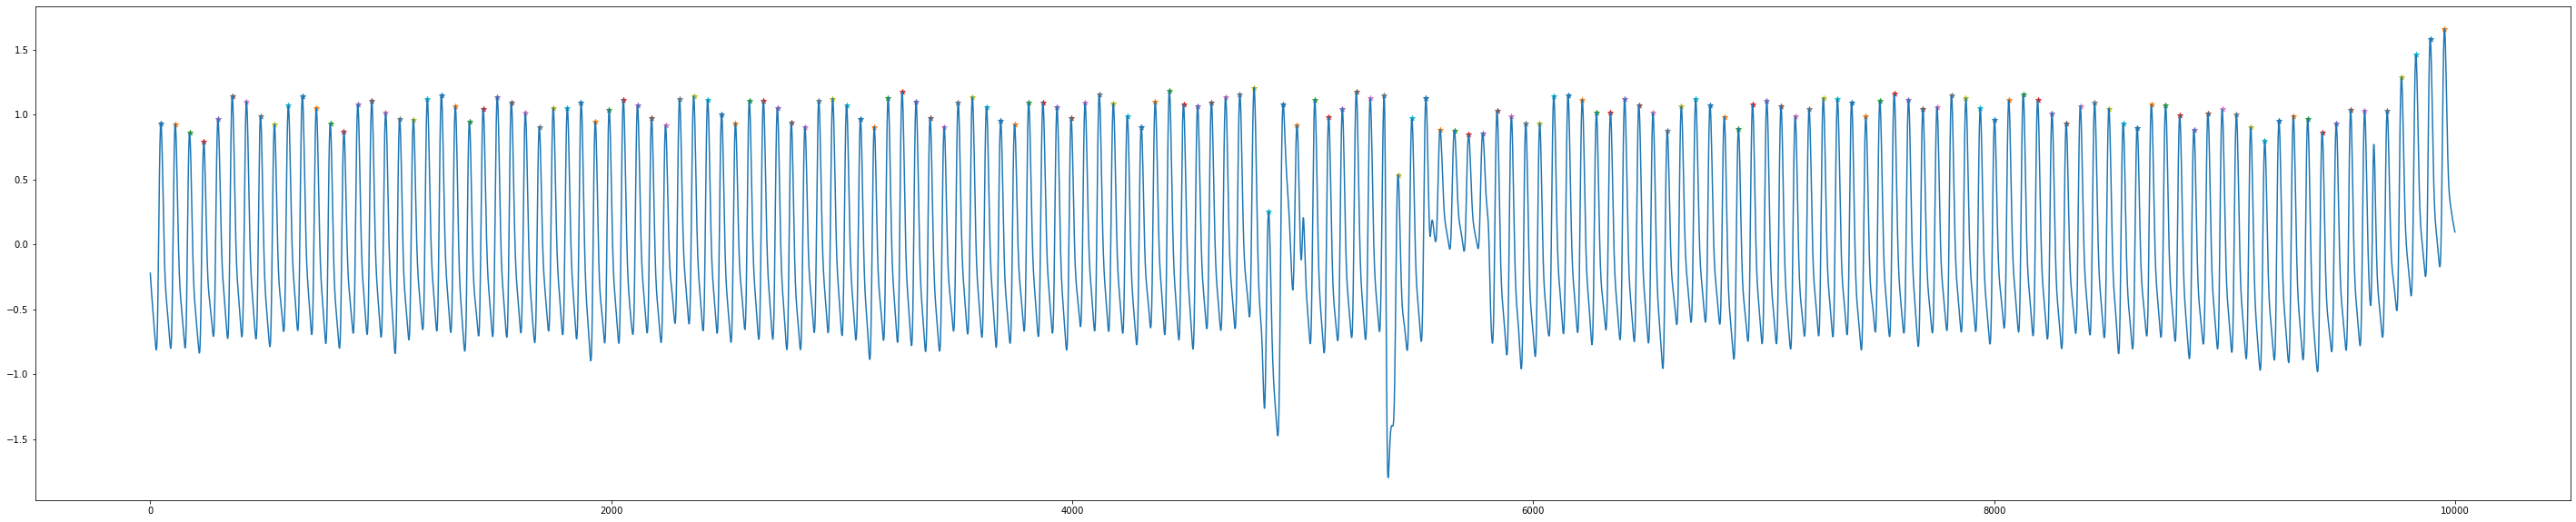

[  37  100  161  222  284  346  407  467  528  588  649  709  769  829
  889  950 1010 1070 1131 1191 1252 1313 1373 1434 1495 1556 1616 1677
 1738 1799 1860 1920 1982 2043 2104 2165 2225 2286 2347 2408 2468 2528
 2589 2649 2709 2769 2829 2889 2950 3010 3070 3130 3190 3251 3312 3373
 3434 3495 3556 3618 3678 3739 3801 3862 3923 3984 4045 4106 4167 4227
 4288 4349 4410 4471 4532 4593 4655 4716 4778 4840 4903 4965 5040 5099
 5159 5220 5280 5340 5400 5462 5523 5585 5646 5708 5770 5832 5894 5955
 6017 6079 6140 6202 6263 6324 6386 6447 6509 6570 6632 6694 6756 6818
 6879 6941 7002 7064 7124 7186 7247 7309 7370 7431 7493 7555 7617 7679
 7741 7804 7866 7928 7990 8053 8115 8177 8239 8300 8362 8424 8486 8547
 8608 8670 8732 8793 8854 8915 8977 9039 9100 9162 9224 9286 9349 9410
 9473 9535 9598 9697 9759 9821 9883 9944] 162


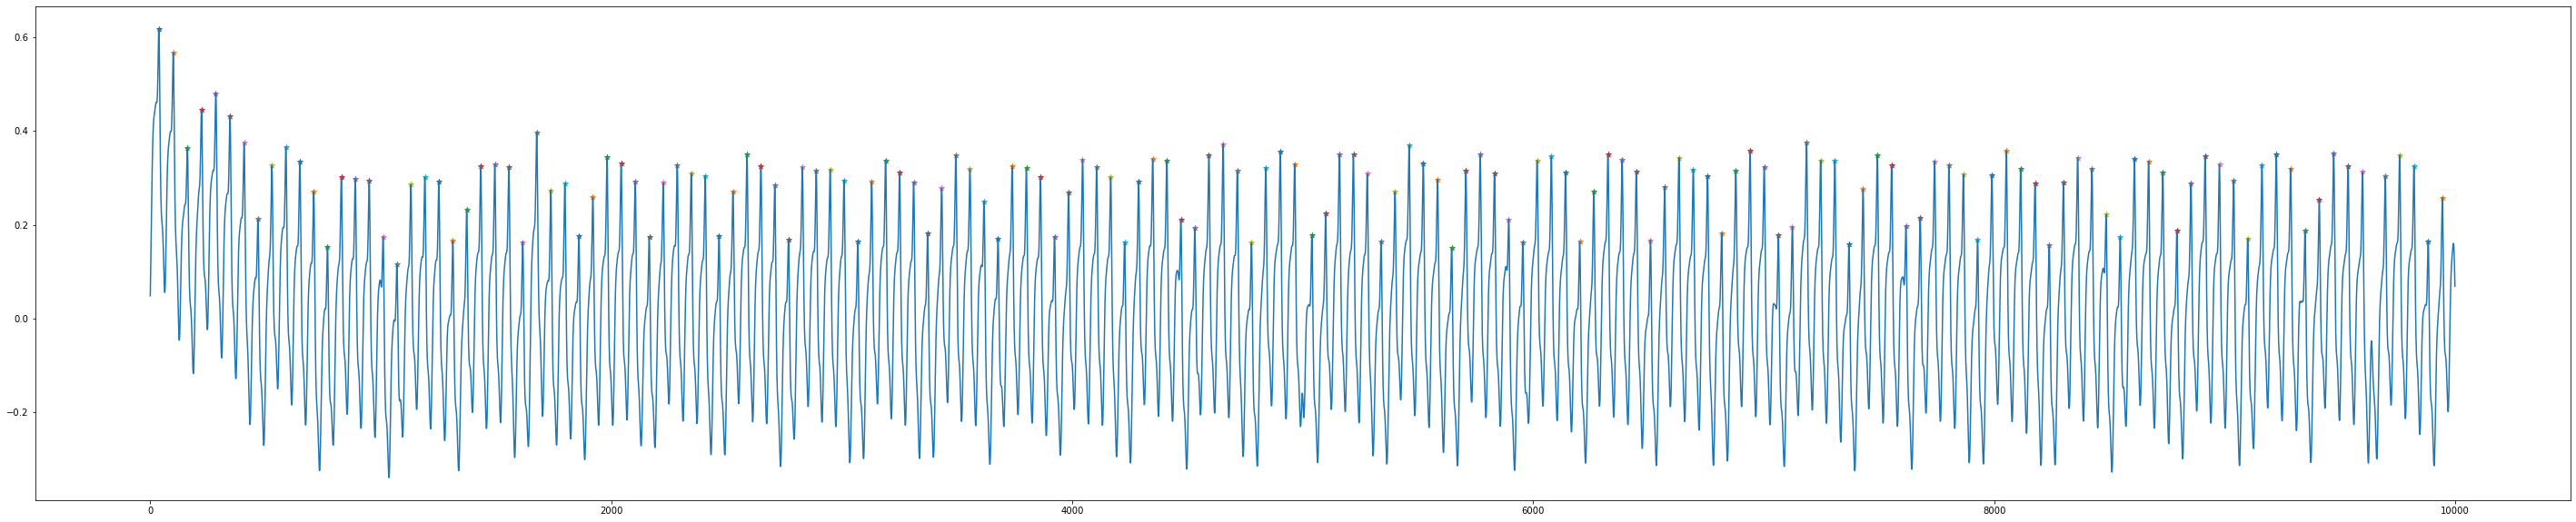

ppg_pulse_rate: 121.87121517965281
ecg_pulse_rate: 121.88351670535984


" # Calculate peak-to-peak time intervals\npeak_to_peak_intervals = np.diff(peaks) / fs\n\n# Calculate pulse width at half-maximum amplitude\npulse_widths = signal.peak_widths(ppg_filtered, peaks, rel_height=0.5)[0] / fs\n\n# Calculate area under the curve\nauc = np.trapz(ppg_filtered, dx=1/fs)\n\n# Calculate power spectral density (PSD) and peak frequency\nfreqs, psd = signal.welch(ppg_filtered, fs)\npeak_frequency = freqs[np.argmax(psd)]\n\n# Calculate spectral entropy\nspectral_entropy = -np.sum(psd * np.log2(psd))\n\n# Compile features into a dictionary\nfeatures = {\n    'pulse_rate': pulse_rate,\n    'mean_peak_to_peak_interval': np.mean(peak_to_peak_intervals),\n    'std_peak_to_peak_interval': np.std(peak_to_peak_intervals),\n    'mean_pulse_width': np.mean(pulse_widths),\n    'std_pulse_width': np.std(pulse_widths),\n    'area_under_curve': auc,\n    'peak_frequency': peak_frequency,\n    'spectral_entropy': spectral_entropy\n}"

In [ ]:
import scipy.signal as signal

fs = 125

# Find peaks in the PPG signal
ppgpeaks, _ = signal.find_peaks(ppg_filtered, distance=fs//2.5)
print(ppgpeaks, len(ppgpeaks))
plt.figure(figsize=(50, 10))
for index in ppgpeaks:
    plt.scatter(index, ppg_filtered[index], marker="*")
plt.plot(ppg_filtered)
plt.show()

# Find peaks in the ECG signal
ecgpeaks, _ = signal.find_peaks(ecg_filtered, distance=fs//2.5)
print(ecgpeaks, len(ecgpeaks))
plt.figure(figsize=(50, 10))
for index in ecgpeaks:
    plt.scatter(index, ecg_filtered[index], marker="*")
plt.plot(ecg_filtered)
plt.show()

# Calculate pulse rate (in beats per minute)
ppg_pulse_rate = 60 * fs / np.mean(np.diff(ppgpeaks))
ecg_pulse_rate = 60 * fs / np.mean(np.diff(ecgpeaks))
print('ppg_pulse_rate:' , ppg_pulse_rate)
print('ecg_pulse_rate:' , ecg_pulse_rate)

''' # Calculate peak-to-peak time intervals
peak_to_peak_intervals = np.diff(peaks) / fs

# Calculate pulse width at half-maximum amplitude
pulse_widths = signal.peak_widths(ppg_filtered, peaks, rel_height=0.5)[0] / fs

# Calculate area under the curve
auc = np.trapz(ppg_filtered, dx=1/fs)

# Calculate power spectral density (PSD) and peak frequency
freqs, psd = signal.welch(ppg_filtered, fs)
peak_frequency = freqs[np.argmax(psd)]

# Calculate spectral entropy
spectral_entropy = -np.sum(psd * np.log2(psd))

# Compile features into a dictionary
features = {
    'pulse_rate': pulse_rate,
    'mean_peak_to_peak_interval': np.mean(peak_to_peak_intervals),
    'std_peak_to_peak_interval': np.std(peak_to_peak_intervals),
    'mean_pulse_width': np.mean(pulse_widths),
    'std_pulse_width': np.std(pulse_widths),
    'area_under_curve': auc,
    'peak_frequency': peak_frequency,
    'spectral_entropy': spectral_entropy
}'''

# print(features)

In [ ]:
SBP = []
DBP = []
bplist = []

for i in range(len(ecgpeaks)-1):
    peak_front = ecgpeaks[i]
    peak_back = ecgpeaks[i+1]
    bplist = bp_data[peak_front:peak_back]
    SBP.append(max(bplist))
    DBP.append(min(bplist))

sbp_values = np.array(SBP)
dpb_values = np.array(DBP)
len(sbp_values)
bp_df = pd.DataFrame(columns=(('SBP','DBP')))
bp_df['SBP'] = sbp_values
bp_df['DBP'] = dpb_values
bp_values = bp_df.values
bp_values

array([[123.03829866,  67.30717569],
       [120.98684628,  66.52567002],
       [118.34926465,  65.59763204],
       [119.57036726,  66.13491718],
       [122.3544812 ,  66.13491718],
       [122.74523404,  67.5025521 ],
       [121.62181964,  67.60024031],
       [120.15649651,  67.06295517],
       [122.06141658,  67.5025521 ],
       [125.18743925,  68.28405777],
       [125.18743925,  69.11440755],
       [122.54985762,  68.08868136],
       [122.25679299,  68.82134292],
       [124.11286896,  68.72365471],
       [126.40854186,  69.35862807],
       [126.11547723,  69.84706911],
       [124.35708948,  67.30717569],
       [123.4290515 ,  69.16325165],
       [125.13859515,  68.6259665 ],
       [127.43426805,  69.16325165],
       [126.60391827,  69.7493809 ],
       [124.35708948,  68.38174598],
       [124.84553052,  69.84706911],
       [127.19004753,  68.96787523],
       [126.99467111,  69.94475732],
       [125.82241261,  70.04244553],
       [123.23367508,  68.72365471],
 

In [ ]:
def segment_signal(signal, rpeaks, window=15):
    segments = []
    for rpeak in rpeaks:
        start = max(0, rpeak - window)
        end = min(len(signal), rpeak + window)
        segment = signal[start:end]
        segments.append(segment)
    return segments

# Assuming you have `ecg_signal`, `ppg_signal`, and `rpeaks`
ecg_segments = segment_signal(ecg_data, ecgpeaks[:len(ecgpeaks)-1])
ppg_segments = segment_signal(ppg_data, ppgpeaks[:len(ppgpeaks)-1])

### Extract Features

In [ ]:
import numpy as np
import scipy.stats
import nolds
from scipy.fft import fft

def extract_features(signal):
    '''# Chaotic features
    lyap_r = nolds.lyap_r(signal)
    hurst_exp = nolds.hurst_rs(signal)
    corr_dim = nolds.corr_dim(signal, 1)'''

    # Time domain features
    mean = np.mean(signal)
    std_dev = np.std(signal)
    skewness = scipy.stats.skew(signal)
    kurtosis = scipy.stats.kurtosis(signal)

    # Frequency domain features
    fft_values = fft(signal)
    power_spectrum = np.abs(fft_values)**2
    total_power = np.sum(power_spectrum)
    low_freq_power = np.sum(power_spectrum[:len(power_spectrum)//2]) / total_power
    high_freq_power = np.sum(power_spectrum[len(power_spectrum)//2:]) / total_power

    features = {
        #'lyap_r': lyap_r,
        #'hurst_exp': hurst_exp,
        #'corr_dim': corr_dim,
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'low_freq_power': low_freq_power,
        'high_freq_power': high_freq_power
    }

    return features

# Assuming `ecg_signal` and `ppg_signal` are your signals
ecg_features = extract_features(ecg_filtered)
ppg_features = extract_features(ppg_filtered)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module='nolds')

from numpy.fft import fft

ecg_feature_list = [extract_features(segment) for segment in ecg_segments]
ppg_feature_list = [extract_features(segment) for segment in ppg_segments]

ecg_features_df = pd.DataFrame(ecg_feature_list)
ppg_features_df = pd.DataFrame(ppg_feature_list)

# Concatenate ECG and PPG features
features_df = pd.concat([ecg_features_df, ppg_features_df], axis=1)
features_data = features_df.values

In [ ]:
pd.concat([features_df, bp_df], axis=1)

,mean,std_dev,skewness,kurtosis,low_freq_power,high_freq_power,mean,std_dev,skewness,kurtosis,low_freq_power,high_freq_power,SBP,DBP
0,0.348860,0.304653,2.158969,4.421787,0.783655,0.216345,2.356142,0.521088,-0.803805,-0.470747,0.976672,0.023328,123.038299,67.307176
1,0.335549,0.312704,2.309341,4.957359,0.767432,0.232568,2.321114,0.535206,-0.816354,-0.491433,0.974744,0.025256,120.986846,66.525670
2,0.216227,0.261330,2.215240,4.807045,0.703175,0.296825,2.258195,0.497096,-0.717543,-0.600246,0.976882,0.023118,118.349265,65.597632
3,0.312529,0.279736,2.370370,5.199758,0.777594,0.222406,2.158097,0.520676,-0.751117,-0.614580,0.972482,0.027518,119.570367,66.134917
4,0.369404,0.308385,2.163222,4.402202,0.794631,0.205369,2.338742,0.498288,-0.790610,-0.470532,0.978277,0.021723,122.354481,66.134917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.332861,0.309109,2.219049,4.616205,0.768428,0.231572,2.270805,0.571865,-0.645748,-0.761060,0.970167,0.029833,126.555074,68.039837
157,0.327876,0.308659,2.487752,5.583118,0.764912,0.235088,2.197458,0.532093,-0.707856,-0.662528,0.972293,0.027707,126.066633,67.990993
158,0.364728,0.319678,2.160464,4.304738,0.782765,0.217235,2.348843,0.532442,-0.723540,-0.611376,0.975551,0.024449,127.873865,68.528278
159,0.350538,0.312466,2.173803,4.449613,0.778597,0.221403,2.394037,0.522005,-0.674981,-0.657209,0.977297,0.022703,126.945827,68.821343


### LSTM-NN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Split data into features and targets
X = features_data
y = bp_df

# Scale features and targets
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create input sequences
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [ ]:
# Initialize the LSTM model
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split

model = Sequential([
    LSTM(50, activation="relu", input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation="relu", return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train the model on the training data
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

# Calculate mean squared error
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Mean squared error: {mse:.3f}")

Epoch 1/50
4/4 [==============================] - 3s 141ms/step - loss: 0.3215 - val_loss: 0.4014
Epoch 2/50
4/4 [==============================] - 0s 22ms/step - loss: 0.2492 - val_loss: 0.2773
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 0.1814 - val_loss: 0.1584
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1743 - val_loss: 0.1704
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1683 - val_loss: 0.2157
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1651 - val_loss: 0.2303
Epoch 7/50
4/4 [==============================] - 0s 26ms/step - loss: 0.1854 - val_loss: 0.2190
Epoch 8/50
4/4 [==============================] - 0s 23ms/step - loss: 0.1703 - val_loss: 0.2002
Epoch 9/50
4/4 [==============================] - 0s 19ms/step - loss: 0.1733 - val_loss: 0.1855
Epoch 10/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1610 - val_loss: 0.1809
Epoch 11/50
4/4 [===========

In [ ]:
# Assuming you have a `bp_values` array representing the corresponding blood pressure values
X = features_df.values
y = sbp_values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Reshape the input data to be suitable for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM-NN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_split=0.1)

y_pred = model.predict(X_test)
mse = tf.keras.losses.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse.numpy())

Epoch 1/100
4/4 - 7s - loss: 16026.8672 - val_loss: 16197.0352 - 7s/epoch - 2s/step
Epoch 2/100
4/4 - 0s - loss: 16020.0127 - val_loss: 16189.1719 - 43ms/epoch - 11ms/step
Epoch 3/100
4/4 - 0s - loss: 16011.9736 - val_loss: 16179.4551 - 54ms/epoch - 13ms/step
Epoch 4/100
4/4 - 0s - loss: 16001.4004 - val_loss: 16166.6924 - 46ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 15987.0742 - val_loss: 16149.2959 - 52ms/epoch - 13ms/step
Epoch 6/100
4/4 - 0s - loss: 15968.8613 - val_loss: 16125.1885 - 87ms/epoch - 22ms/step
Epoch 7/100
4/4 - 0s - loss: 15943.8936 - val_loss: 16091.7676 - 44ms/epoch - 11ms/step
Epoch 8/100
4/4 - 0s - loss: 15908.0000 - val_loss: 16046.3525 - 178ms/epoch - 45ms/step
Epoch 9/100
4/4 - 0s - loss: 15862.8066 - val_loss: 15987.0801 - 63ms/epoch - 16ms/step
Epoch 10/100
4/4 - 0s - loss: 15795.9385 - val_loss: 15913.9854 - 88ms/epoch - 22ms/step
Epoch 11/100
4/4 - 0s - loss: 15722.8193 - val_loss: 15829.4521 - 50ms/epoch - 12ms/step
Epoch 12/100
4/4 - 0s - loss: 156

### Random forest model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X_scaled = features_df.values
y = bp_values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error for both SBP and DBP
mse_sbp = mean_squared_error(y_test["SBP"], y_pred[:, 0])
mse_dbp = mean_squared_error(y_test["DBP"], y_pred[:, 1])

print(f"Mean squared error for SBP: {mse_sbp:.3f}")
print(f"Mean squared error for DBP: {mse_dbp:.3f}")


Mean squared error for SBP: 2.846
Mean squared error for DBP: 1.518
